# Introdução a Processamento de Imagens

Imagem é um termo que provem do latim imāgo e que se refere à figura, representação, semelhança ou aparência de algo.

No meio digital, imagens são usadas principalmente no marketing e na divulgação de diferentes assuntos.

O que pode-se fazer com Python?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mtimg

In [2]:
# Vamos usar essa função para plotar as várias imagens pertencentes a esse notebook
def plot_image(img, img_name, x, y):
    #definindo as dimensões da do gráfico que sustentará a imagem advinda de uma matriz
    plt.figure(figsize=(x,y))
    
    #removendo a moldura do gráfico
    plt.axis(False)

    #plotando a imagem recebida
    plt.imshow(img)

    #adicionando o título do gráfico
    plt.title(img_name)

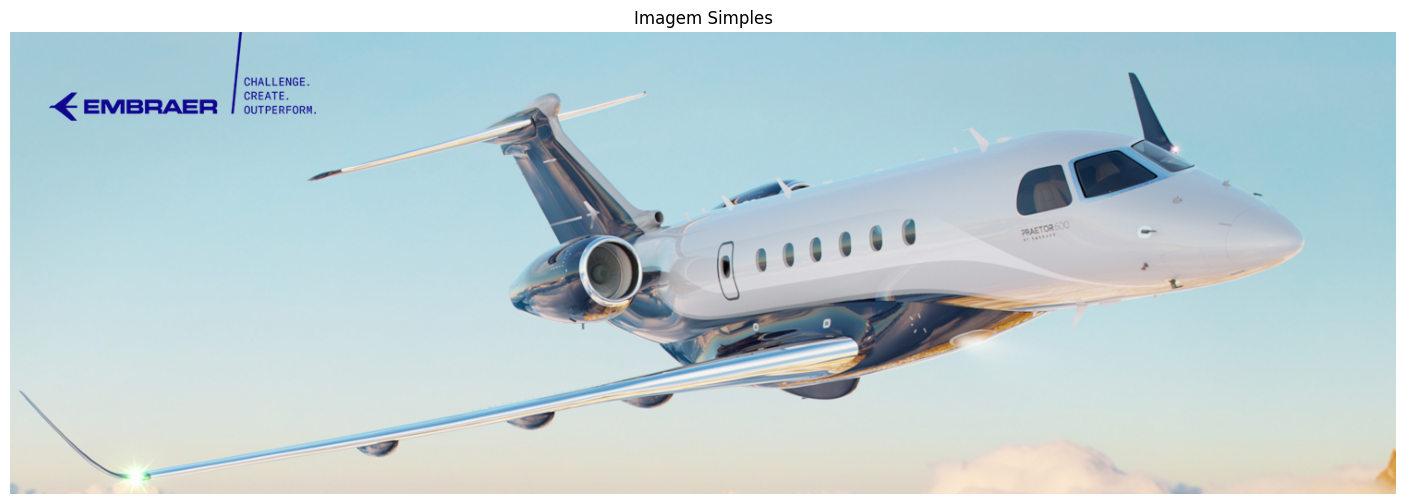

In [4]:
img = plt.imread('img_exp.png', 0)
plot_image(img, 'Imagem Simples', 20, 6)

In [11]:
type(img)

numpy.ndarray

Como podemos ver acima, a imagem foi armazenada numa matriz 'ndarray', se printarmos ela não poderemos ver todos os elementos pelo seu extenso tamanho.
Para demonstrar isso, o print usa das reticências, informando a continuidade da matriz.

In [12]:
print(img)

[[[169 205 219]
  [165 201 215]
  [164 202 215]
  ...
  [149 198 213]
  [149 198 213]
  [149 198 213]]

 [[169 205 219]
  [165 201 215]
  [164 202 215]
  ...
  [149 198 213]
  [149 198 213]
  [147 199 213]]

 [[169 205 219]
  [164 202 215]
  [164 202 215]
  ...
  [146 198 212]
  [147 199 213]
  [146 198 212]]

 ...

 [[171 190 197]
  [166 186 193]
  [167 188 193]
  ...
  [230 193 148]
  [230 193 148]
  [231 194 149]]

 [[169 189 196]
  [165 185 192]
  [165 186 191]
  ...
  [232 195 151]
  [233 196 151]
  [231 197 151]]

 [[168 188 195]
  [162 185 191]
  [165 186 191]
  ...
  [232 198 152]
  [232 198 152]
  [232 198 152]]]


In [13]:
#verificando as dimensões dessa matriz
img.shape

(500, 1500, 3)

Note a multidimensionalidade da matriz, contendo 500 linhas e 1500 colunas, além também das 3 camadas representando o *Padrão RGB* de cores, isto é, a intensidade de que cada pixel tem de vermelho (Red), verde (Green) e azul (Blue), sendo cada camada é estabelecida por sua própria matriz.

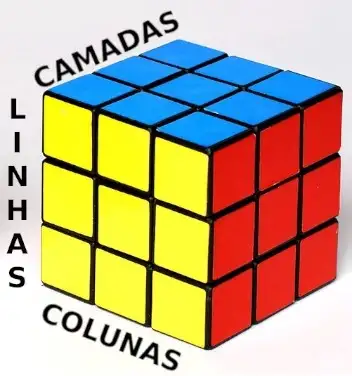

# Relação com Álgebra Linear
Considerando a interpretação de imagens como matrizes, a aplicaçação de operações matriciais também se torna válida. Abaixo, apresentamos alguns exemplos. 


## Matriz inversa
Seja:
\begin{align}
  M = \begin{bmatrix} 
    a & b \\
    c & d \\
  \end{bmatrix}
\end{align}

Sua matriz inversa ($M^{-1}$), se existir, seria o equivalente a:
\begin{align}
  M^{-1} = \frac{1}{ad-bc} 
  \begin{bmatrix}
    d & -b \\
    -c & a \\
  \end{bmatrix}
\end{align}

Obs: Uma matriz $M$ só é invertível caso seu determinante seja não-nulo ($det(M)$ $\neq 0$).

Exemplo:

Considere a seguinte inversão matricial:
\begin{align}
  M = \begin{bmatrix}
    6 & 1 \\
    5 & 2 \\
  \end{bmatrix}
\end{align}

\begin{align}
  M^{-1} = \frac{1}{7} 
    \begin{bmatrix}
    2 & -1 \\
    -5 & 6 \\
  \end{bmatrix}
\end{align}

\begin{align}
  M^{-1} = 
    \begin{bmatrix}
    2/7 & -1/7 \\
    -5/7 & 6/7 \\
  \end{bmatrix}
\end{align}

Numa imagem, cada pixel tem sua cor invertida, simplesmente invertendo sua matriz correspondente.

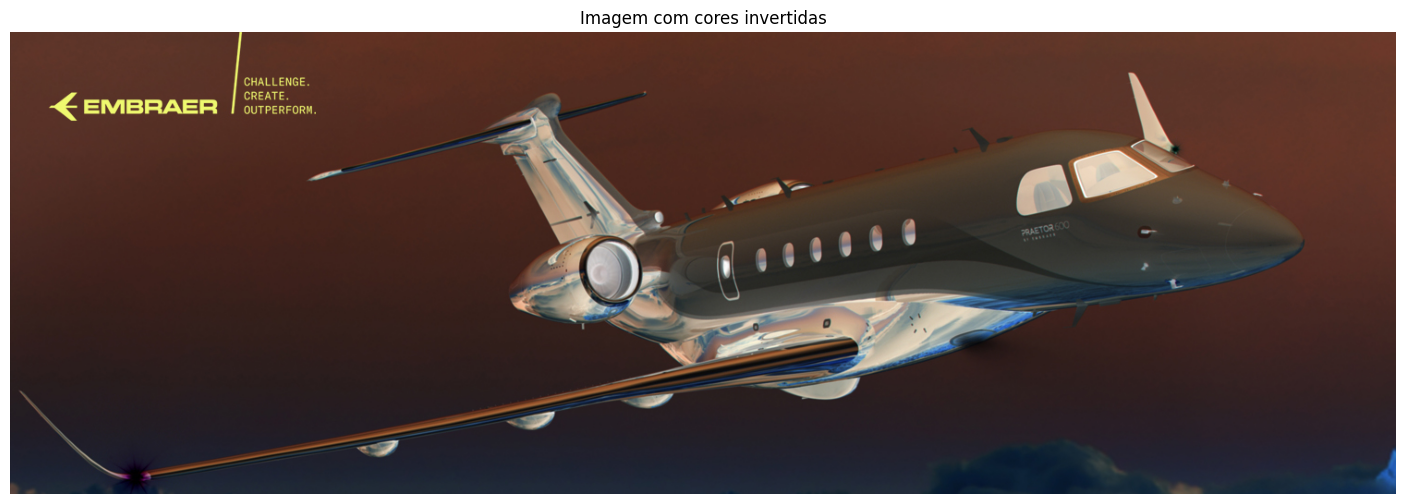

In [14]:
img_inv = np.invert(img)
plot_image(img_inv, "Imagem com cores invertidas", 20, 6)

Para clareza do que foi feito, podemos reiverter a matriz que foi invertida, conseguindo assim, reobter a matriz original.

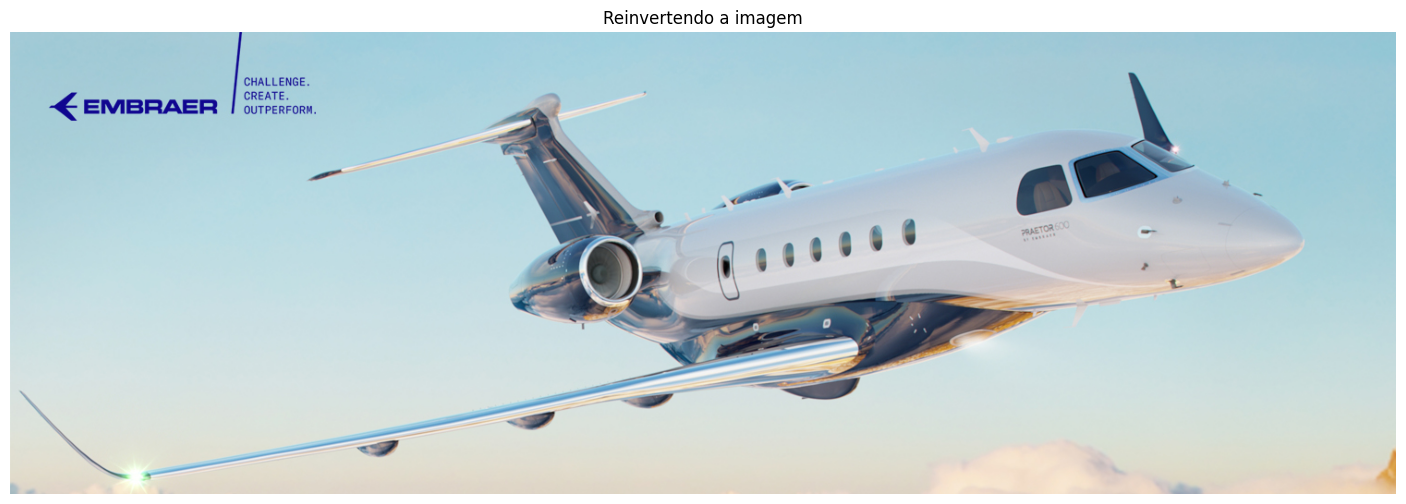

In [15]:
img_og = np.invert(img_inv)
plot_image(img_og, "Reinvertendo a imagem", 20, 6)

## Matriz Transposta
A transposição de uma matriz troca entre si suas linhas e colunas. A transposta de uma matriz $M_{3 \ 2}$ é definida por $M^t_{2 \ 3}$.

Acima pode-se perceber que houve a troca de '$n$' por '$m$' na matriz transposta. Ou seja, os elementos dispostas nas linhas de uma matriz foram organizados na coluna da matriz originada após as substituições.


Exemplo:

Considere a seguinte matriz:
\begin{align}
  M = \begin{bmatrix}
    a & b & c\\ 
    d & e & f\\ 
  \end{bmatrix} 
\end{align}

Sua matriz transposta seria:
\begin{align}
  M^t = \begin{bmatrix}
    a & d \\ 
    b & e \\ 
    c & f \\ 
  \end{bmatrix} 
\end{align}

Numa imagem, isso seria equivalente a rotacionar a matriz 90° para esquerda.

In [16]:
img_tr = np.transpose(img)

Só isso não é suficientemente, dado que não foi invertido somente as linhas e as colunas, mas também a posição delas entre as camadas. 
Obs: Mais sobre as camadas será falado a seguir.

In [17]:
img_tr = np.swapaxes(img_tr, 0, 1)
img_tr = np.swapaxes(img_tr, 1, 2)

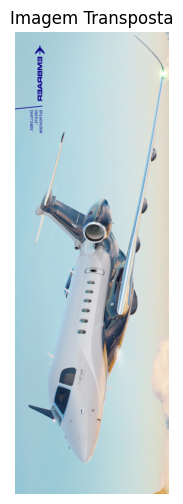

In [18]:
plot_image(img_tr, "Imagem Transposta", 20, 6)

## Matriz de Rotação

Uma matriz de rotação, como o próprio nome já diz, é uma matriz que roda um vetor no espaço em que está contido.
Aqui nos limitaremos a rotação no $\mathbb{R}^2$.

### Rotação no $\mathbb{R}^2$
A rotação é a transformação $R: \mathbb{R}^2 \to \mathbb{R}^2$, tal que $R(\vec v) = \vec u$, sendo $\vec u$ o vetor $\vec v$ rotacionado $\theta$ graus. Obviamente, a rotação pode tanto ocorrer no sentido horário quanto no sentido anti-horário.

Esta rotação deve seguir algumas regras:

1 - $Rot_\theta(\vec x + \vec y) = Rot_\theta(\vec x) + Rot_\theta(\vec y)$

2 - $Rot_\theta(c \vec x) = c \cdot Rot_\theta(\vec x)$  

Fazendo uso de manipulação algébrica e considerando a fórmula de Pitágoras podemos chegar ao resultado de que a transformação responsável pela rotação anti-horária de vetores no $\mathbb{R}^2$ é dada por:

\begin{align}
  R = 
  \begin{bmatrix}
    cos(\theta) & -sen(\theta) \\ 
    sen(\theta) & cos(\theta) \\
  \end{bmatrix}
\end{align}

Aqui, usaremos uma função pronta pertencente a biblioteca *scipy* chamada **ndimage**. A mesma é reponsável por rotacionar uma matriz de entrada no plano definido pelos eixos (axes) dados como parâmetro.

In [19]:
# importando a biblioteca scipy do python
from scipy import ndimage

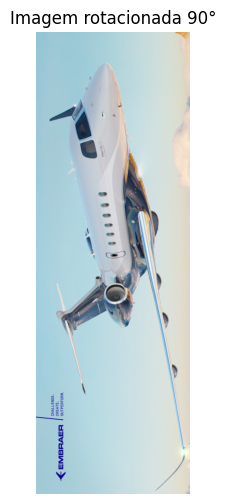

In [20]:
# a variável img_rt recebe a matriz da variável img após sofrer uma transformação linear
# usando uma matriz de rotação. O ângulo é 90°
img_rt = ndimage.rotate(img, 90)
plot_image(img_rt, "Imagem rotacionada 90°", 20, 6)

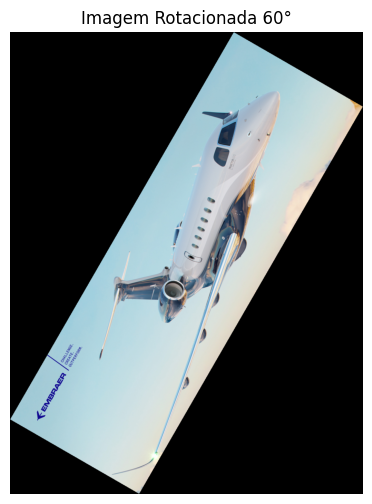

In [21]:
# Agora aplicando uma rotação de 60°.
img_rt = ndimage.rotate(img, 60)
plot_image(img_rt,"Imagem Rotacionada 60°", 20, 6)

# Camadas da Imagem
Uma única imagem é formada por 3 matrizes diferentes combinadas linearmente, sendo cada uma delas correspondente a intensidade de cor (Vermelho, Verde e Azul) de cada camada. Assim, podemos vizualizar cada camada de forma individual.

In [5]:
# vamos pegar cada camada de matrizes que compõem a imagem
# primeiro a variável R recebe uma cópia da matriz que posssui os dados da imagem
# segundo vamos zerar as outras duas camadas, levando em considaderação todas as suas linhas e colunas
R = img.copy()
R[:, :, [1, 2]] = 0

# fazemos o mesmo para G e B
G = img.copy()
G[:, :, [0,2]] = 0


B = img.copy()
B[:, :, [0, 1]] = 0

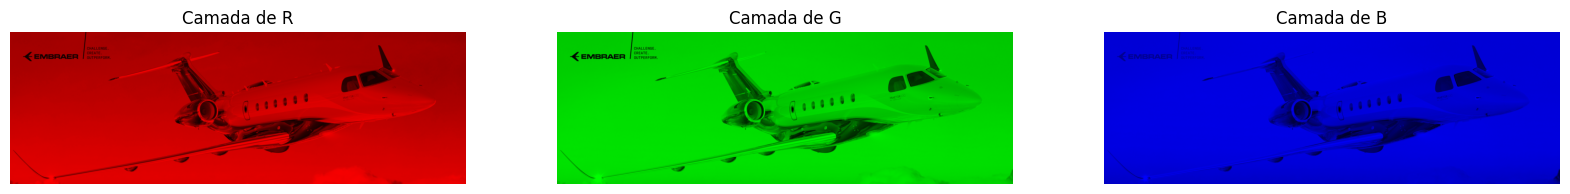

In [7]:
plt.figure(figsize = (20,6))

# o comando subplot tem a finalidade de plotar mais de um gráfico em uma única compilação

# as entradas subplot(1,3,1) indicam que o gráfico tem uma linha, 3 colunas e o próximo gráfico a ser 
# plotado ficará na posição 1

def plot_subplots(title, img):
    plt.title(title)
    plt.axis(False)
    plt.imshow(img)

plt.subplot(1, 3, 1)
plot_subplots("Camada de R", R, )

plt.subplot(1, 3, 2)
plot_subplots("Camada de G", G)

plt.subplot(1, 3, 3)
plot_subplots("Camada de B", B)

Agora é mais fácil de perceber que o cada matriz individualmente corresponde ao comportamento de cada cor. Podemos combinar linearmente estas matrizes para reconstruir a imagem original.

In [24]:
# mesmo tendo zerado as camadas que não são aquelas referenciadas na matriz, elas ainda existem.
# Portando, para evitar erros de compilação, vamos pegar as linhas, colunas e camadas individuais da matriz
img_RGB = np.array([R[:, :, 0], G[:, :, 1], B[:, :, 2]])

# novamente, as matrizes de camadas estão desordenadas no array multidimensional imagem.
# Vamos fazer permutações entre as camadas de forma que elas fiquem na ordem desejada
img_RGB = np.swapaxes(img_RGB, 0, 1)
img_RGB = np.swapaxes(img_RGB, 1, 2)

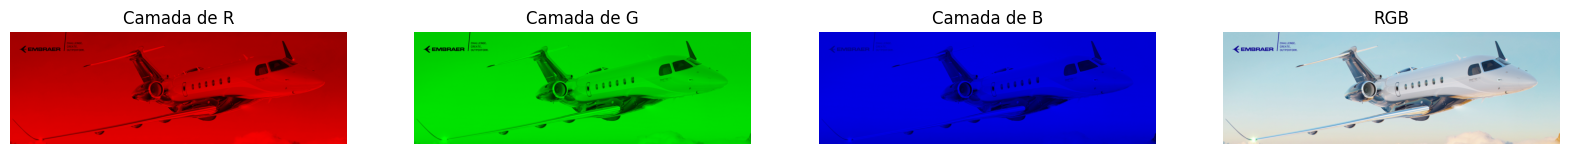

In [25]:
plt.figure(figsize = (20,6))
plt.subplot(1, 4, 1)
plot_subplots("Camada de R", R)

plt.subplot(1, 4, 2)
plot_subplots("Camada de G", G)

plt.subplot(1, 4, 3)
plot_subplots("Camada de B", B)

plt.subplot(1, 4, 4)
plot_subplots("RGB", img_RGB)

# Caos 

A partir daqui, será utilizado uma tranformação linear sobre um quadrado unitário do plano xy para interpretar o conceito da aplicação caótica.

O termo **caos** é utilizado em algumas transformações matemáticas e em alguns fenômenos físicos que parecem possuir um comportamento totalmente aleatório e imprevisível, porém, possui um elemento de ordem bem definido. Exemplos de sistemas caóticos são a vibração da asa de um avião, o embaralhar das cartas de um baralho e a geração de números aleatórios.

A partir daqui, será apresentado a transformação caótica denominada gato de Arnold, em homenagem ao matemático Vladimir I. Arnold, o primeiro à utlizar o esboço de um gato para representa-lá.

## Gato de Arnold

A transformação do gato de Arnold é uma aplicação $\Gamma: \rm I\!R^2 \rightarrow \rm I\!R^2$, definida como:

$\begin{equation} 
\Gamma:(x,y) \rightarrow (x+y,x+2y)\mod1
\end{equation}$

Podendo ser definida na forma matricial:

$\begin{equation} 
\Gamma 
\left(\begin{bmatrix}x \\ y\end{bmatrix}\right) = 
\begin{bmatrix}1&1 \\ 1&2\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \mod 1 
\end{equation}$

E na forma fatorada:

$\begin{equation} 
\Gamma \left(\begin{bmatrix}x \\ y\end{bmatrix}\right) = 
\begin{bmatrix}1&0 \\ 1&1\end{bmatrix}\begin{bmatrix}1&1 \\ 0&1\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \mod 1 \end{equation}$

Nesse formato, é possível interpretar a transformação como um cisalhamento duplo, primeiramente na direção x e posteriomente na posição y, ambos de fator 1. Também é possível interpretar que, ao ser uma operação aritmética $\mod 1$, a transformação leva cada ponto para um outro ponto de um quadrado unitário, denominado S. Além disso, é possível realizar a operação modular a cada cisalhamento e, para facilitar a vizualização, S será um quadrado de tamanho P (quantidade de pixels em um eixo da imagem), como é possível ver a seguir:

**As imagens tratadas nesse notebook são do formato .pmg - imagens na escala do cinza - para ser tratada pela transformação de forma mais simples, já que a mesma trabalha com duplas (x, y).**

In [9]:
# Produz uma imagem dobrada (largura e altura), espelhando a imagem 4 vezes
def quadruplicar(img:np.array, p:int) -> np.array:
  shape = [p*2,p*2]
  img2 = np.zeros(shape, dtype=np.int32)

  img2[:p, :p] = img
  img2[img2.shape[1]-p:img2.shape[0], :p] = img
  img2[:p, img2.shape[1]-p:img2.shape[0]] = img
  img2[img2.shape[1]-p:img2.shape[0], img2.shape[1]-p:img2.shape[0]] = img
  
  return img2

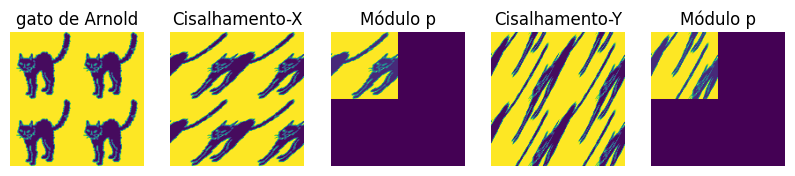

In [10]:
# O método usado abaixo simula o ladrilhamento, um outro método de interpretar 
# a transformação, para deixar a visualização passo a passo mais simples. É importante
# deixar claro que não funciona igual a aritmética mod 1, pois sua periodicidade prevê que
# no final do ciclo não necessariamente o mesmo ponto que voltará à sua posição original,
# mas um outro ponto de mesma cor.


# Imagem original .pgm (cores da escala do cinza)
ori_img = mtimg.imread("gato76.pgm")
p = ori_img.shape[0]
p1 = p-1

shape = [p*2,p*2]
img_q = img = quadruplicar(ori_img, p)
pp = img.shape[0]

cis1 = np.array([[1,0],[1,1]])
cis2 = np.array([[1,1],[0,1]])

#Cisalhamento no eixoX
cis1_img = np.zeros(shape)
for l in range(pp):
  for c in range(pp):
    cis1_img[l,c-l] = img[l,c] 

#Aplicando a operação modular
mod1_img = np.zeros(shape)
for l in range(pp):
  for c in range(pp):
    mod1_img[l%p,c%p] = cis1_img[l,c] 

# Reestabelecendo o quadrilhamento perdido na operação modular
img = quadruplicar(mod1_img[:p,:p], p)

#Cisalhamento no eixoY
cis2_img = np.zeros(shape) 
for l in range(pp):
  for c in range(pp):
    cis2_img[l-c,c] = img[l,c]

#Aplicando a operação modular novamente
mod2_img = np.zeros(shape)
for l in range(pp):
  for c in range(pp):
    mod2_img[l%p,c%p] = cis2_img[l,c] 

plt.figure(figsize=(10,10))
plt.subplot(2, 5, 1)
plot_subplots("gato de Arnold", img_q)
plt.subplot(2, 5, 2)
plot_subplots("Cisalhamento-X", cis1_img)
plt.subplot(2, 5, 3)
plot_subplots("Módulo p", mod1_img)
plt.subplot(2, 5, 4)
plot_subplots("Cisalhamento-Y", cis2_img)
plt.subplot(2, 5, 5)
plot_subplots("Módulo p", mod2_img)

Transformações como a do gato de Arnold sugerem modelos caóticos baseado em iterações. Abaixo é demonstrado o que acontece quando se executa a transformação 25 vezes na mesma imagem:

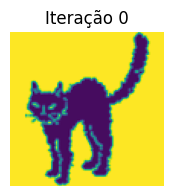

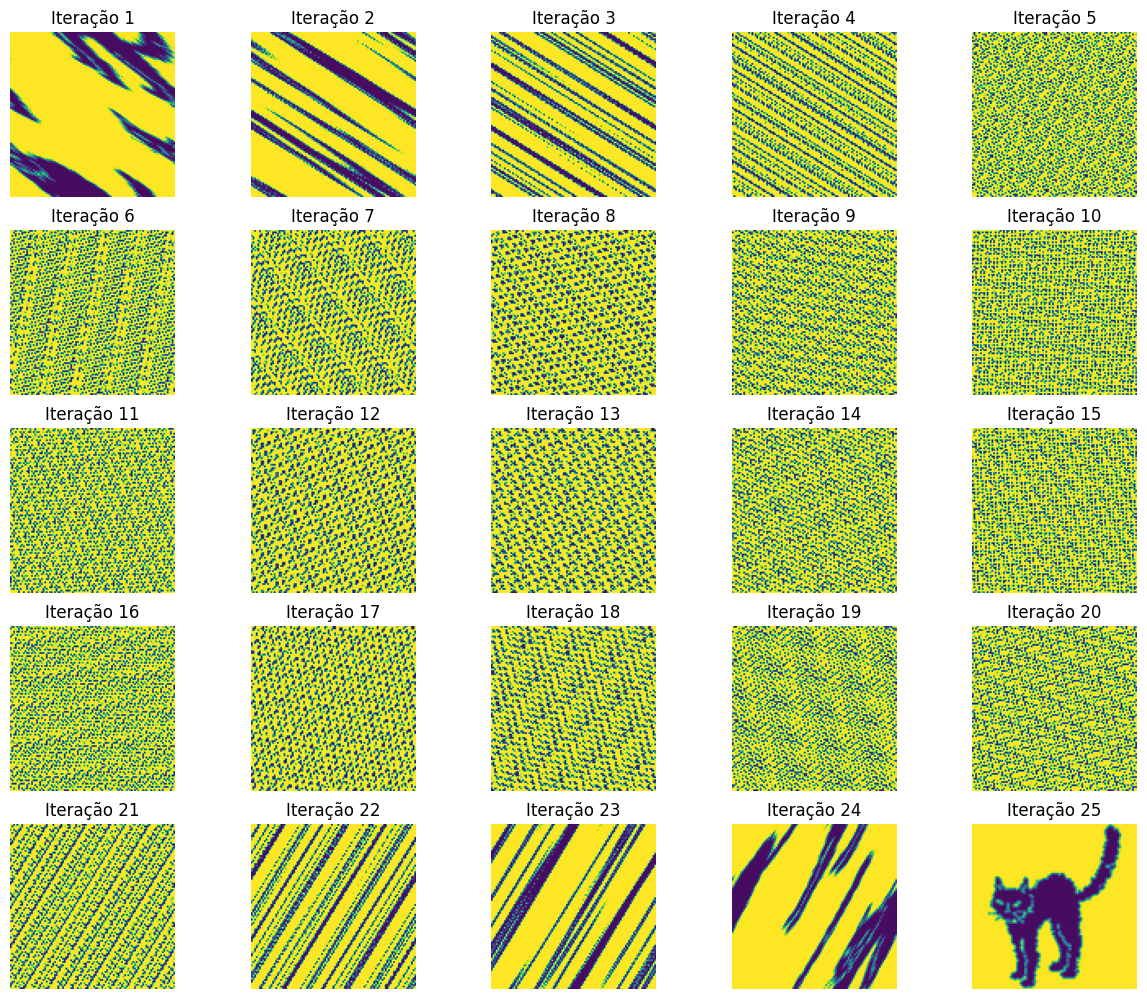

Toda imagem é repartida em quadrados discretos denominados **pixels**. Para tratamento pela transformação, cada pixel de S é definido por um par de coordenadas (m/p, n/p), onde m e n são valores que variam de 0 a p-1.

Ao permitir que S (quadrado unitário) possua qualquer subdivisão interna, cada aplicação de S resultará no tratamento de $p^2$ pontos de pixel uniformemente espaçados. Aplicando a transformação a cada ponto, obtém-se:
$\begin{equation} 
\Gamma \left(\begin{bmatrix}\frac{m}{p} \\ \frac{n}{p} \end{bmatrix}\right) = 
\begin{bmatrix}1&1 \\ 1&2\end{bmatrix}\begin{bmatrix}\frac{m}{p} \\ \frac{n}{p}\end{bmatrix} \hspace{-0.3cm} \mod{p} =
\begin{bmatrix}\frac{m+n}{p} \\ \frac{m+2n}{p}\end{bmatrix} \hspace{-0.3cm} \mod{p} \end{equation}$

O novo par ordenado $((m+n)/p, (m+2n)/p)$ é interpretado como um novo ponto de pixel de S $(m'/p, n'/p)$, onde m' e n' são valores do intervalo 0, 1, 2, ..., p-1, ou seja, $m' = (m+n) \mod{p}$ e $n' = (m+2n) \mod{p}$. De acordo com esse modelo de transformação, percebe-se que cada pixel pode percorrer, no máximo, $p^2$ pontos distintos em S, até voltar à sua posição original.

Ao retornar a sua posição, após $n$ aplicações da transformação, mas não retorna com menos de $n$ interações, diz-se que o ponto possui **período $n$** e o conjunto de $n$ iteradas é um **ciclo de período $n$**. Vale ressaltar que nem todos os pontos possuem o mesmo período, dessa forma, o menor múltiplo de todos os períodos é denotado $\Pi(p)$, período da aplicação de pixels.

In [45]:
# Transformação do gato de Arnold
def C(m:int, n:int) -> np.array:
  return np.array([(m+n)/p, (m+2*n)/p])

In [69]:
# Busca o período de aplicação de pixels para determinado p
def ciclo(p:int) -> int:
  periodo = []

  # for para percorrer todos os pontos de pixel
  for i in range(1, p):
    m = n = i
    inicialM = m
    inicialN = n
    xt = C(m,n) % 1

    i = 0; ml = 0; nl = 0
    while(ml != inicialM or nl != inicialN):
      ml = (m+n)%p; nl = (m+2*n)%p
      m = ml; n = nl
      
      i += 1

    periodo.append(i)

  # Retorna o menor múltiplo comum entre os períodos
  return np.lcm.reduce(periodo)

In [123]:
# Implementação da transorfamação por toda a imagem Pi(p) vezes
def gatoArnold(img_:np.array, metade:bool = False, plot:bool=False) -> np.array:
  img = img_.copy()
  p = img.shape[0]
  p1 = p-1
  
  nova_img = img.copy()
  
  if metade:
    periodo = ciclo(p)//2
  else:
    periodo = ciclo(p)
  
  linhas_plot = int(np.sqrt(periodo))

  for i in range(periodo):
    
    for x in range(p):
      for y in range(p1, -1, -1):
        m = (x+(p1-y))%p
        n = (x+2*(p1-y))%p

        nova_img[m][n] = img[x][p1-y]
    
    img = nova_img.copy()

    if plot:
      plt.subplot(linhas_plot+1, 10, i+1)
      plt.axis(False)
      plot_subplots(f"Iteração {i+1}", img)
      
  return nova_img

Embora a aplicação de pixels precise de $\Pi(p)$ iterações para retornar à sua posição original, ocorrem algumas curiosidades durante a execução.

Se $p = 250$ ($\Pi(p) = 750$) e observa-se a imagem formada pela iteração $375$, a imagem estará perfeita, porém, de cabeça para baixo, como pode ser visto no plot abaixo. Também ocorrem imagens 'fantasmas' durante a execução, pois muitos pontos de pixel possuem um período divisor de $750$. 

<Figure size 1500x1500 with 0 Axes>

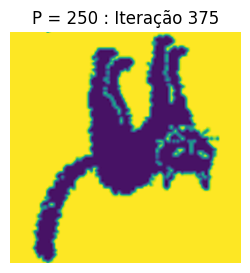

In [112]:
img = mtimg.imread("gato250.pgm")
plt.figure(figsize=(15,15))
t = gatoArnold(img, metade=True, plot=False)

### Faixas
Para entender a existência das faixas presentes nas iterações da imagen (vide as iterações 2, 3, 22, 23, 24, por exemplo)  
devemos pensar na imagem de uma forma "ladrilhada", ou seja, pegamos a imagem e a repartirmos em diversos quadrados que se estendem para fora dos extremos da quantidade de pixels. 
Além disso devemos observar a matriz C (matriz transformação do gato de arnold):

$$
C = 
\begin{bmatrix} 
1 & 1 \\ 
1 & 2
\end{bmatrix}. 
$$

Observando tal matriz e sua determinante (que é 1), podemos dizer que ela preserva áreas; em outras palavras, a área de qualquer figura no plano, e a área de sua imagem são iguais.

Támbem devemos olhar para os autovalores e autovetores de C. 
A simetria da matriz significa que seus autovalores são reais e que os autovetores correspondentes são perpendiculares.

Os autovalores e autovetores em questão são:

$$
\lambda_1 = \frac{3 + \sqrt{5}} {2} = 2,6180..., \space \space \space \space 
\lambda_2 = \frac{3 - \sqrt{5}} {2} = 0,3819....
$$

$$
v_1 = 
\begin{bmatrix}
1 \\
\frac{1 + \sqrt{5} }{2}
\end{bmatrix},

\space \space \space \space

v_2 = 
\begin{bmatrix}
\frac{-1 - \sqrt{5}}{2} \\
2
\end{bmatrix}

=

\begin{bmatrix}
-1,6180 \\
1
\end{bmatrix}
$$

Em cada aplicação da transformação do gato de Arnold, o autovalor $ \lambda_1 $ causa uma dilatação na direção do autovetor $v1$ de fator $2,6180$ e o autovalor $\lambda_2$ causa uma contração na direção do autovetor $v2$ de fator $0,3819$.

Em suma, o efeito das faixas ocorrer porque os autovetores transportam pontos de um ladrilho a outro e essa viagem acaba depois da enésima iteração, formalmente falando:

Dado um espaço $S$ e um ponto $p$ pertencente a $S$, temos um ponto $q$ fora de $S$ (da mesma cor de $p$) e que, com sucessivas iterações, dirige-se ao ponto inicial de $p$ após a enésima iteração.

Podemos definir os pontos $p$ e $q$ a partir da seguinte equação:
$$
q = (C^{-1})^{n} p = C^{-n}, \text{pois  } C^{n}q = C^{n}(C^{-n}p) = p 
$$

Segue abaixo um código para encontrar $q$ a partir de  um determinado $n$ e $p$:


In [ ]:
#Obter ponto q
#Função que retorna um ponto q a partir de um ponto p e o periodo n 
def findQ(n, p):

    #Pegar a matriz inversa transformação do Gato de Arnold 
    C = np.array([1, 1], [1, 2])
    C_inv = np.linalg.inv(C)
    
    #Itera-la pelo período n
    new_C = C_inv @ C_inv
    for i in range(n - 1):
        new_C = new_C @ new_C
        
    # Multiplica-la por p 
    q = new_C @ p
    
    return q 
    